# Inception V1 Module 1


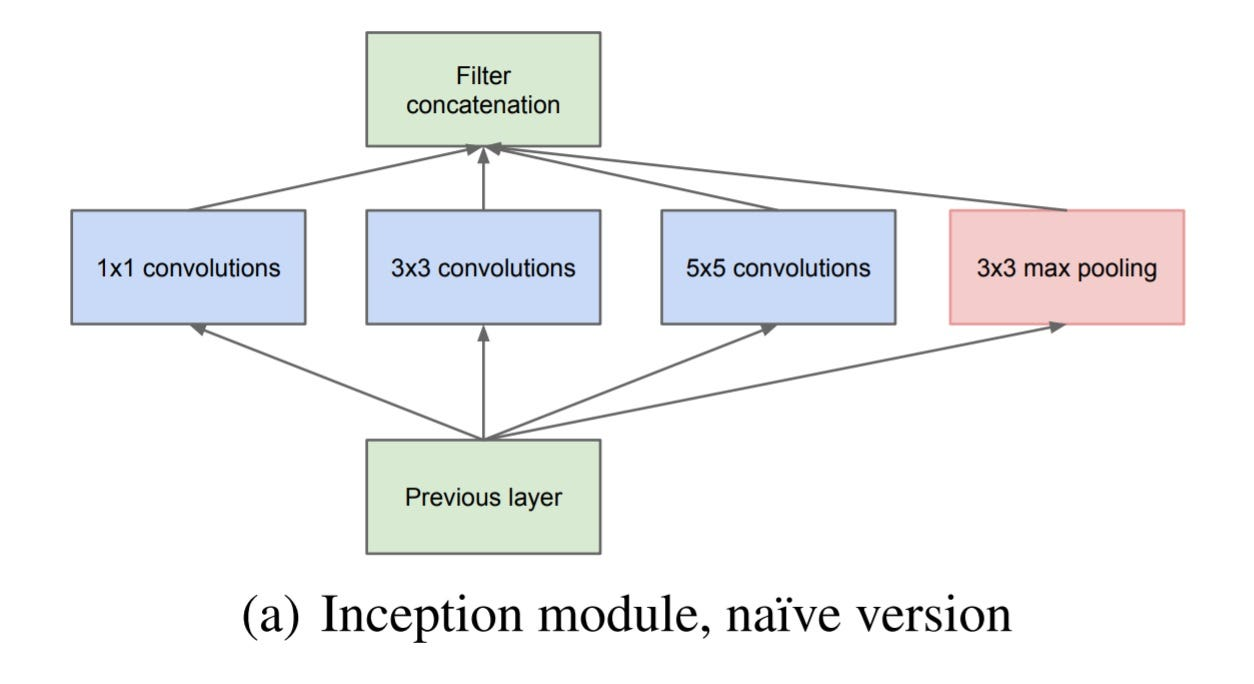

The Idea is that the model will learn form its parallel filters of different filter sizes.
Now,
Why do we have different Filter sizes ?
--> Smaller the information area  = smaller filter size & Lager the information area = Larger filter size.

Now, Another question is how to choose smaller filter size or larger filter size ?
 During training a model we can't justify that for this image use this filter size and for this image choose this particular filter size, the model will be train in one go therefore, we have multiple parallel filters of different sizes.


# Inception V1 module 2 --> Dimention Reduction or No of Parameters reduction for less computation power

--> Less parameters means less computational power required.

--> Therefore we will just apply (1 x 1) convolutional layer before (3 x 3) & (5 x 5) convolutional layer and also (1 x 1) convolutional layer after (3 x 3) pooling layer.


ex. Image we have an image of (32 * 32 * 512) and we need to apply (5 * 5) window of 128 such filters --> means we need 128 such filters of (5, 5,   512), therefore 5 * 5 * 512 = 12800 parameters.


Now if we apply (1 * 1) convolutional layer before (5 * 5) layer, then we perform (1 * 1 * 512) of 128 filters of size (1 * 1 * 512) = 512 parameters which is very less as compared to previous one.



Therefore the image size is reduced from (32 * 32 * 512) to (32 * 32 *128) and now we will apply (5 * 5) convolutions and the computations will be less.




# Inception V3 --> What are the modifications done on Module 2 of Inception V1 to become V3

# Inception Block A

--> Here we have factorized the layers into samller convolutional layers by replacing (5 * 5) convolutional Layer with 2 (3 * 3) convolutional layers because [5 * 5 = is giving 25 parameters] whereas [(3 * 3) + (3 * 3) = is giving us only 18 parameters].


# Inception Block C
--> Now again we have factorized the (3 * 3) convolutional layers into Asymmetric convolutional layer. [i.e. (1 * 3) & (3 * 1)] becuase (3 * 3 = is giving us 9 parameters) but {[1 * 3]+[3 * 1] = is giving us only 6 parameters}

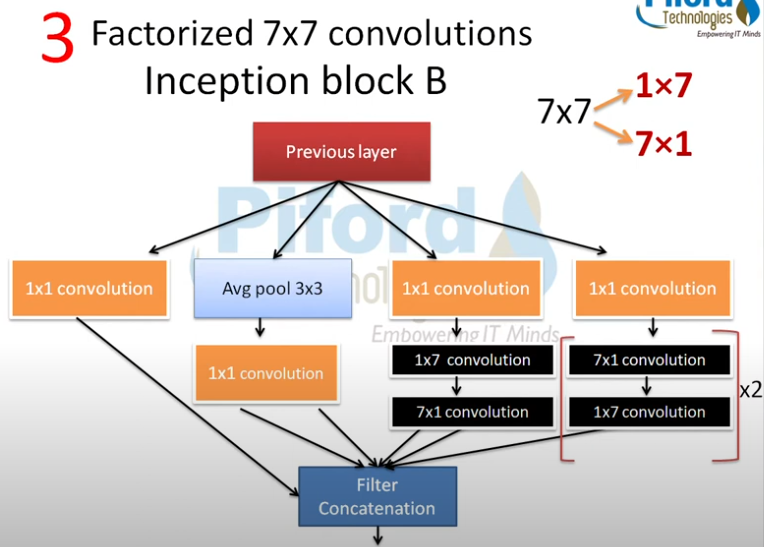

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_type_folders = os.listdir('/content/drive/MyDrive/DataSet')
print("Folders inside Dataset Folder = ",image_type_folders)

Folders inside Dataset Folder =  ['positive', 'negative']


In [ ]:
retinopathy_images = []

for folders in image_type_folders:
  # enter each folder one by one
  folder_name = os.listdir('/content/drive/MyDrive/DataSet' + '/' + folders)

  # adding images to the list from a specific folder
  for images in folder_name:
    retinopathy_images.append((folders, str('/content/drive/MyDrive/DataSet' + '/' + folders) + '/' + images))
    print(retinopathy_images[:1])

[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input


[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate_DR_439.png')]
[('positive', '/content/drive/MyDrive/DataSet/positive/Moderate

In [ ]:
images_df = pd.DataFrame(data=retinopathy_images, columns=['Type', 'Image'])
images_df.head()

Type                                              Image
0  positive  /content/drive/MyDrive/DataSet/positive/Modera...
1  positive  /content/drive/MyDrive/DataSet/positive/Modera...
2  positive  /content/drive/MyDrive/DataSet/positive/Modera...
3  positive  /content/drive/MyDrive/DataSet/positive/Modera...
4  positive  /content/drive/MyDrive/DataSet/positive/Modera...

In [ ]:
# let's check how many samples are there
print("Total number of images in the dataset: ", len(images_df))

Total number of images in the dataset:  2752


In [ ]:
images_count = images_df['Type'].value_counts()

images_count


Type
positive    1750
negative    1002
Name: count, dtype: int64

In [ ]:
import cv2
path = '/content/drive/MyDrive/DataSet'

image_size = 299
images = []
labels = []

for folder_names in image_type_folders:
  data_path = path + '/' + folder_names
  filenames = [folder_names for folder_names in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path + '/' + f) # reading images in the form of an array of pixel values
    img = cv2.resize(img, (image_size, image_size)) # here we are resizing all the images into same size
    images.append(img)
    labels.append(folder_names)

In [ ]:
# Converting image array into numpy array
images = np.array(images)
images = images.astype('float32') / 255.0 # Dividing by 255 beacuse the pixel intensity lies between 0 to 255
images.shape

(2752, 299, 299, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

labels = labels.reshape(-1, 1)

Y = to_categorical(labels)
Y.shape

[1 1 1 ... 0 0 0]


(2752, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2201, 299, 299, 3)
(551, 299, 299, 3)
(2201, 2)
(551, 2)


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
# Create an instance of the InceptionV3 model
# Include_top=False means we exclude the final classification layer & True means include the final layer
# We will add our own classification layer later
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers in the base model (optional but recommended for transfer learning)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model on top of the InceptionV3 base
model = models.Sequential()
model.add(base_model) # Add the InceptionV3 base
model.add(layers.GlobalMaxPooling2D()) # Global average pooling to reduce the size of the image
model.add(layers.Dense(128, activation='relu')) # Dense Layer with ReLu activation function
model.add(layers.Dense(2, activation='softmax')) # This is the output layer where the image will be classified based on the probability value,
# (i.e. which class that particular image is belongs to)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Here after 35 epochs the overall model accuracy rate degrades therefore we are fitting the model for only 35 iterations

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=8) # Adjust epochs and batch size as needed

Epoch 1/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.8378 - loss: 0.5872
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9271 - loss: 0.2246
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9501 - loss: 0.1404
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9537 - loss: 0.1223
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9485 - loss: 0.1538
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9568 - loss: 0.1119
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9673 - loss: 0.0850
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9701 - loss: 0.0844
Epoch 9/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9597 - loss: 0.1149
Epoch 10/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9761 - loss: 0.0688
Epoch 11/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9804 - loss: 0.0540
Epoch 12/30
276/276 ━━━━━━━━━━

In [ ]:
y_pred = model.predict(x_test)
y_pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 623ms/step


array([[1.0959572e-04, 9.9989045e-01],
       [4.8679560e-11, 1.0000000e+00],
       [9.9999571e-01, 4.2876727e-06],
       ...,
       [7.9749541e-14, 1.0000000e+00],
       [9.9999988e-01, 7.0371414e-08],
       [3.6045690e-18, 1.0000000e+00]], dtype=float32)

1. 93.10% accuracy on 20 epochs
2. 93.83% accuracy on 30 epochs
3. 92.56% accuracy on 40 epochs therefore overall accuracy rate decreases when epoch is greater than or equivalent to 40

# Test the model by giving Testing data

In [ ]:
loss, test_accuracy = model.evaluate(x_test, y_test)
accuracy = test_accuracy * 100
print(f"Overall Accuracy of the model = {accuracy:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.9396 - loss: 0.2989
Overall Accuracy of the model = 93.28%


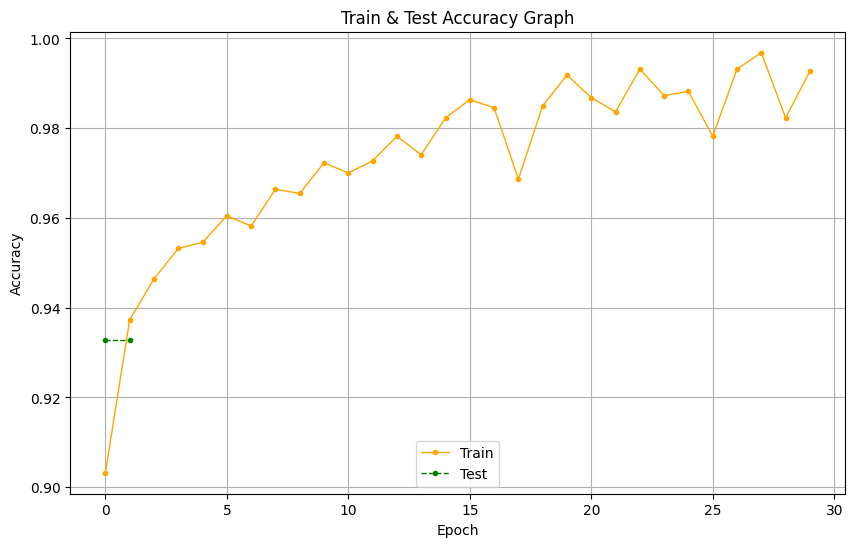

In [ ]:
import matplotlib.pyplot as plt

x_value = test_accuracy

def plot_accuracyGraph(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.history['accuracy'], color = 'orange', linewidth = 1, marker = '.')
  plt.plot([x_value,x_value], color='green', linestyle='--', label=f'x = {x_value}', linewidth = 1, marker = '.')
  plt.title('Train & Test Accuracy Graph')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid(True)
  plt.legend(['Train', 'Test'], loc='lower center')
  plt.show()

plot_accuracyGraph(history)